<a href="https://colab.research.google.com/github/norhaneng/TASK2_Prodigy_Infotech.ipynb/blob/main/TASK2_Titanic_Prodigy_Infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df = df.drop_duplicates(keep='first')

In [6]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)

<ipython-input-7-46ab2c9f3cc7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-46ab2c9f3cc7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
# Convert 'Sex' and 'Embarked' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


<ipython-input-9-100cb0ec6ac6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


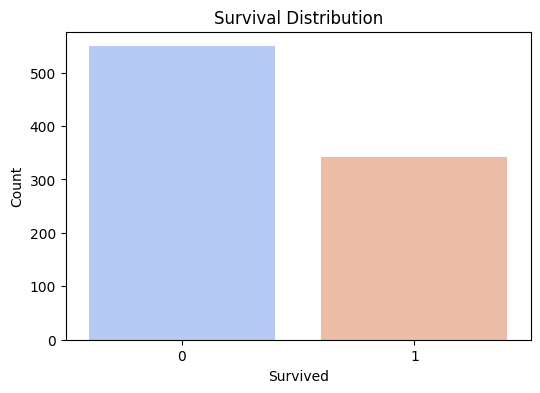

In [9]:
# Distribution of Survived
# Bar plot for survival distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

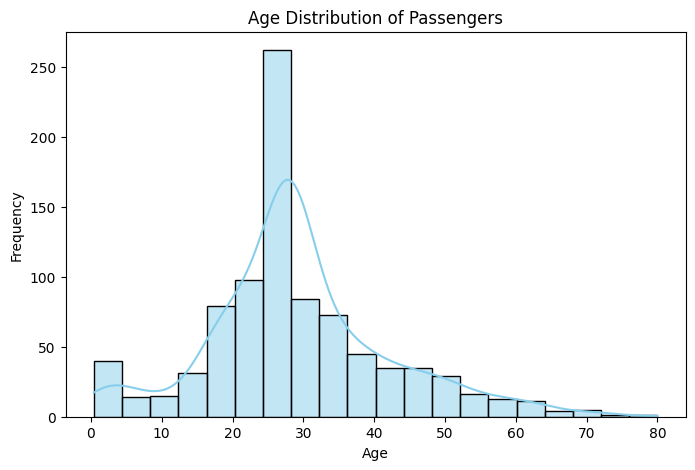

In [10]:
# Age distribution with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

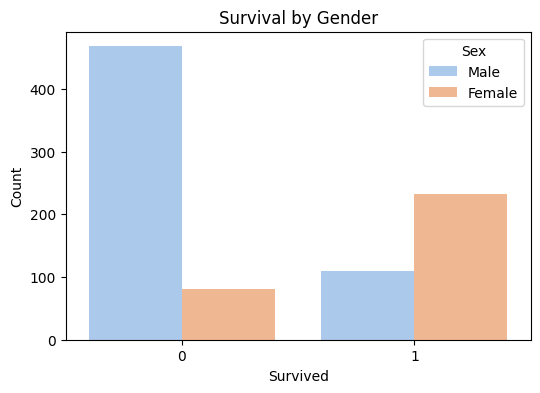

In [11]:
# Gender vs. Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='pastel')
plt.title("Survival by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

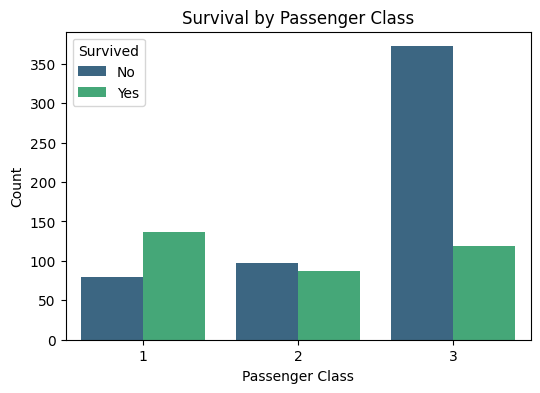

In [12]:
# Class vs. Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

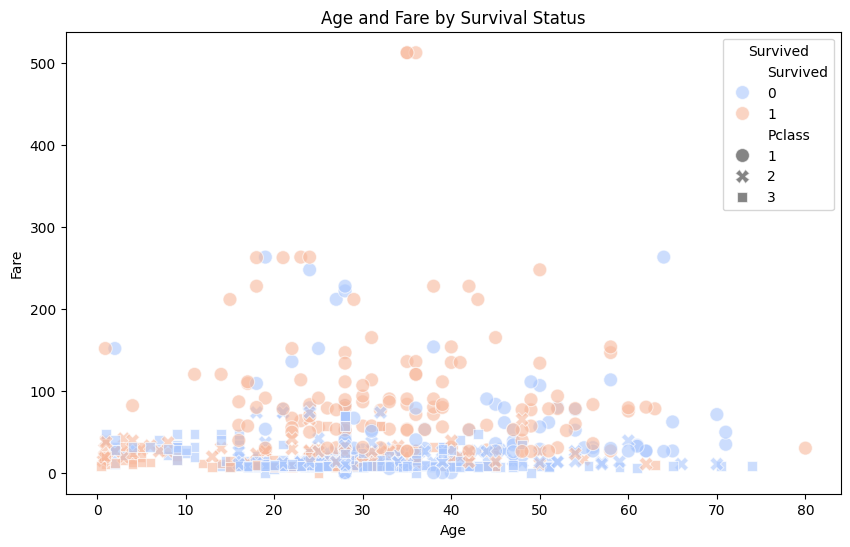

In [13]:
# Age and Fare vs. Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Pclass', data=df, palette='coolwarm', s=100, alpha=0.6)
plt.title("Age and Fare by Survival Status")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

In [14]:
# Check distribution of categorical variables
print(df['Pclass'].value_counts())
print(df['Survived'].value_counts())


Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


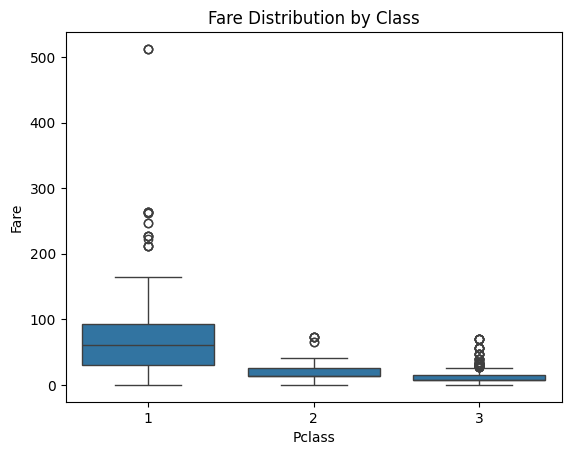

In [15]:
# Boxplot of Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()



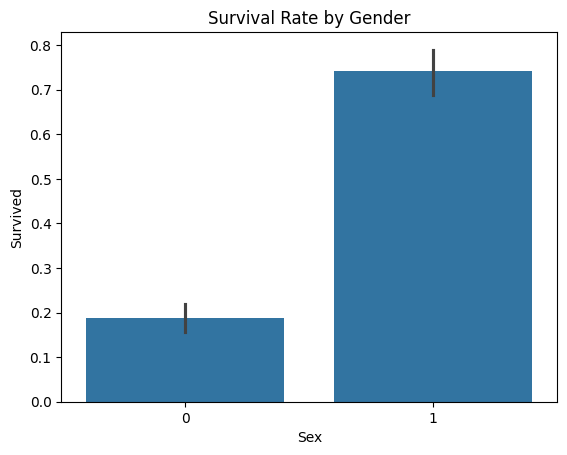

In [16]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


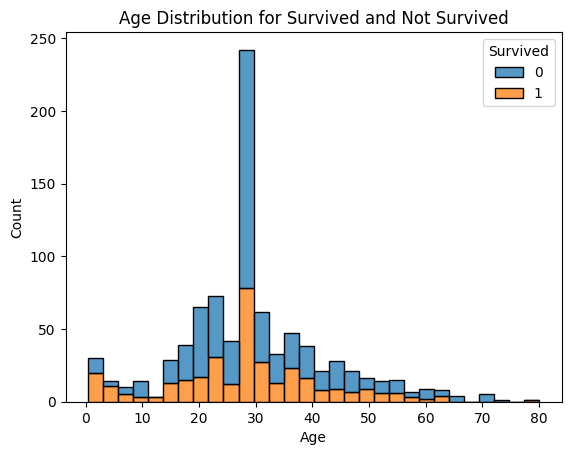

In [17]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution for Survived and Not Survived")
plt.show()


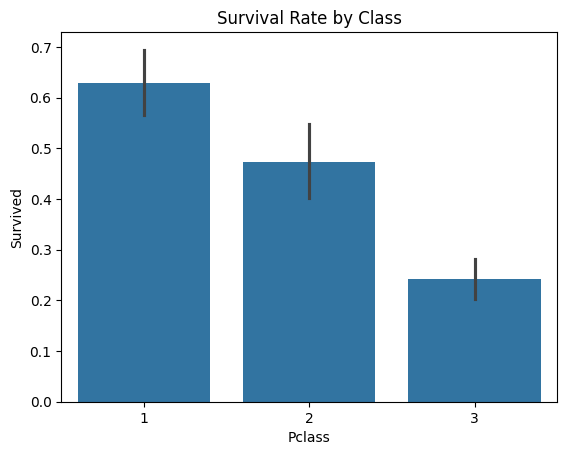

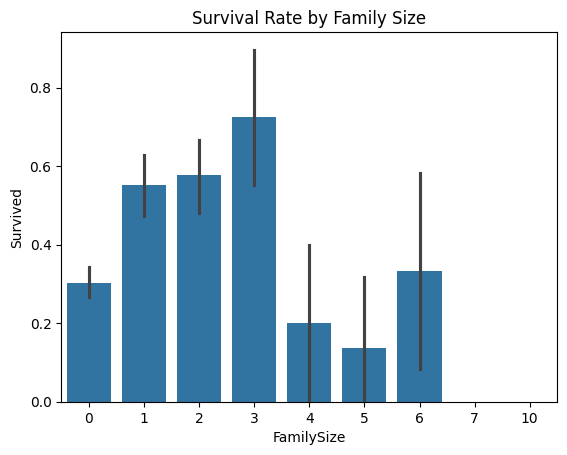

In [18]:
# Survival Rate by Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

# Correlation between family size (SibSp + Parch) and survival
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


In [19]:
df.drop(columns=['Name'], inplace=True)

df.drop(columns=['Ticket'], inplace=True)

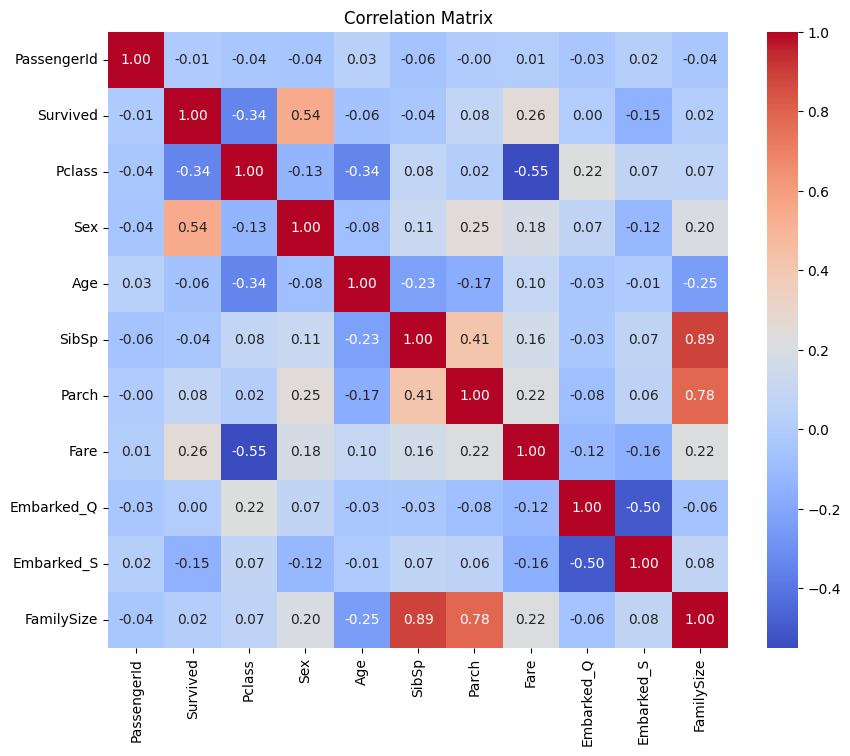

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [21]:
## # Fill missing Cabin values with 'Unknown'
# df['Cabin'].fillna('Unknown', inplace=True)

# # Drop rows where Age or Embarked is missing
# df.dropna(subset=['Age', 'Embarked'], inplace=True)

# # Convert 'Pclass' and 'Survived' to categorical
# df['Pclass'] = df['Pclass'].astype('category')
# df['Survived'] = df['Survived'].astype('category')

# Countplot for Survival
# sns.countplot(x='Survived', data=df)
# plt.title("Survival Count")
# plt.show()
# # Heatmap of correlations
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()
# # Histogram of Age
# sns.histplot(df['Age'], bins=20, kde=True)
# plt.title("Distribution of Age")
# plt.show()